In [ ]:
import os
import zipfile
from PIL import Image
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Image as PlatypusImage
from reportlab.lib import utils

## Create Pitch Deck PDFs from Sample of Startups

### Filter for Pre-Seed and Seed rounds only

In [ ]:
df = df.loc[(df['Round'] == 'Pre-Seed') | (df['Round'] == 'Seed')]

In [ ]:
print(len(df))
df.head()

338


,Name,Description,Industry,Sector,Business Model,Customer,Round,AmountRaised_EUR,Investor,Year,Links,Location,City,State,Country,Geo
0,Airbnb,Airbnb is an online marketplace for people to ...,"Hospitality, Travel",Technology and Software,Marketplace,"B2C, B2B",Seed,636000.0,"VC, Angel Investors",2008,"['https://airbnb.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",San Francisco,California,United States,"(37.7790262, -122.419906)"
3,Beatdapp,Beatdapp provides real-time tracking of media ...,"Blockchain, Software, Music, Audio, Analytics",Technology and Software,SaaS,B2B,Seed,2544000.0,VC,2019,"['https://beatdapp.com/', 'https://www.crunchb...","['Vancouver', 'British Columbia', 'Canada']",Vancouver,British Columbia,Canada,"(49.2608724, -123.113952)"
6,Blue Wire,Blue Wire is a network of podcasters who cover...,"Audio, Media, Entertainment, Sports",Technology and Software,Other,B2C,Pre-Seed,1272000.0,VC,2020,"['https://bluewirepods.com/', 'https://www.cru...","['San Francisco', 'California', 'United States']",San Francisco,California,United States,"(37.7790262, -122.419906)"
9,Buffer,Bufferâs suite of apps and tools are designe...,"Marketing, Social Media, Analytics, Productivity",Retail and Consumer,"SaaS, Subscription",B2B,Seed,530000.0,"VC, Angel Investors",2011,"['https://buffer.com/', 'https://www.crunchbas...","['San Francisco', 'California', 'United States']",San Francisco,California,United States,"(37.7790262, -122.419906)"
13,Coinbase,Coinbase is a digital currency exchange that a...,"FinTech, Cryptocurrency, Blockchain",Financial Services,Marketplace,B2C,Seed,636000.0,VC,2012,"['https://coinbase.com/', 'https://www.crunchb...","['San Francisco', 'California', 'United States']",San Francisco,California,United States,"(37.7790262, -122.419906)"


### Undersample to get a balanced sub sample

338


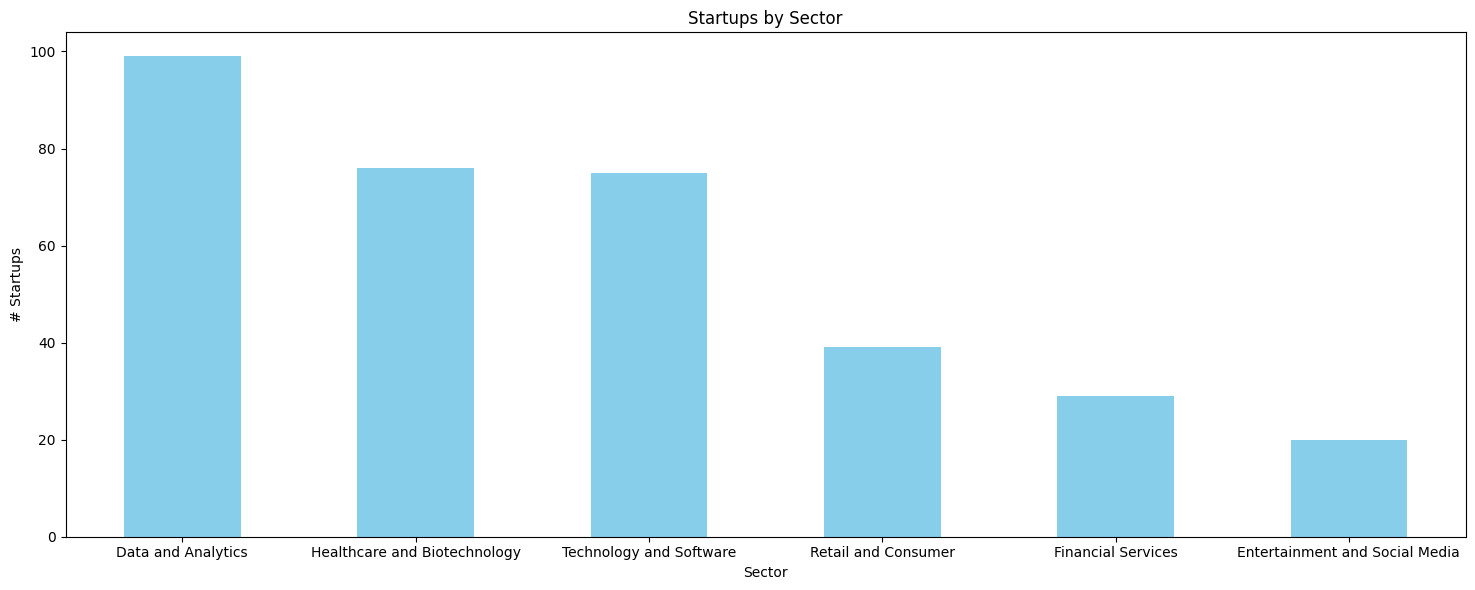

In [ ]:
print(len(df))
sector_counts = df['Sector'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 6))
sector_counts.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.title('Startups by Sector')
plt.xlabel('Sector')
plt.ylabel('# Startups')

# Wrap x-axis labels for better readability
plt.xticks(rotation=0)  # Set rotation to 0 degrees

# Display the bar chart
plt.tight_layout()
plt.show()

12


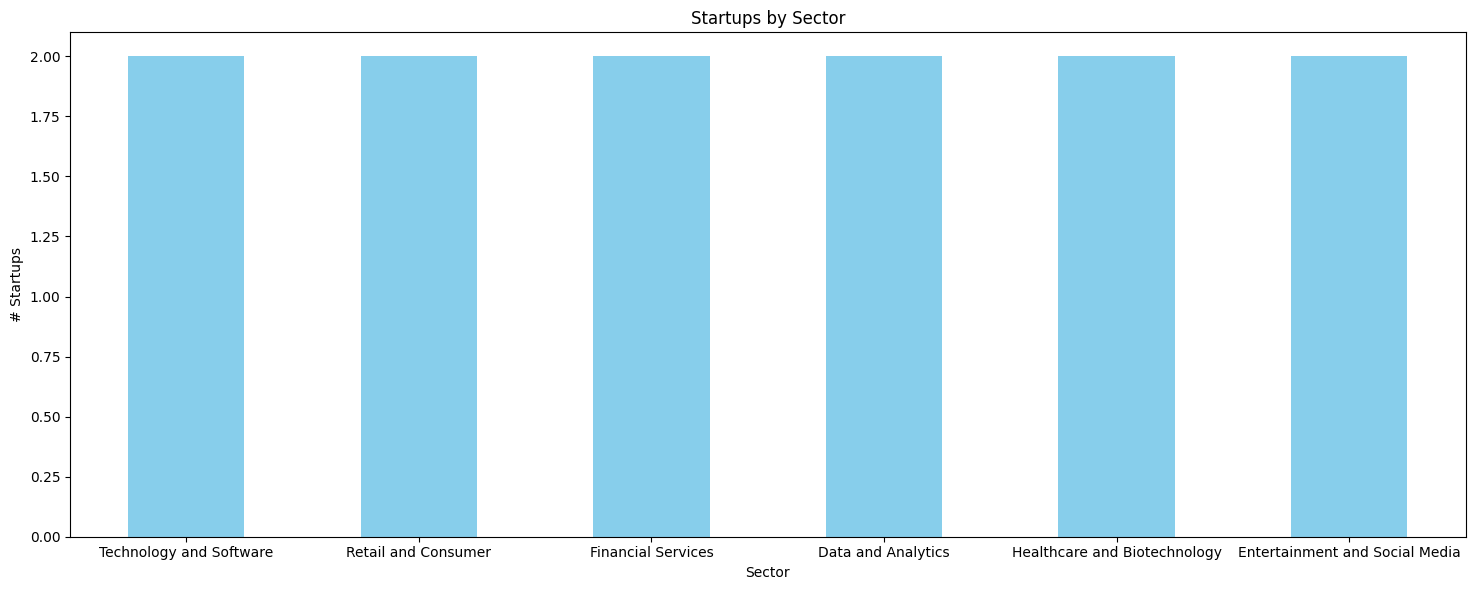

In [ ]:
# Sample size you want for each class
desired_samples_per_class = 2

# Initialize an empty list to store the undersampled data
undersampled_data = []

# Iterate over the unique values in the 'Sector' column
for sector in df['Sector'].unique():
    # Filter the original DataFrame by the current sector
    sector_data = df[df['Sector'] == sector]
    
    # If there are more than the desired number of samples, randomly select 20
    if len(sector_data) > desired_samples_per_class:
        sector_data = sector_data.sample(desired_samples_per_class, random_state=42)
    
    # Append the selected samples to the list
    undersampled_data.append(sector_data)

# Concatenate the data in the list to create the undersampled DataFrame
undersampled_df = pd.concat(undersampled_data, ignore_index=True)

# Now, 'undersampled_df' contains a balanced dataset with 20 samples for each class.
sector_counts = undersampled_df['Sector'].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 6))
sector_counts.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.title('Startups by Sector')
plt.xlabel('Sector')
plt.ylabel('# Startups')

# Wrap x-axis labels for better readability
plt.xticks(rotation=0)  # Set rotation to 0 degrees

# Display the bar chart
plt.tight_layout()
print(len(undersampled_df))
plt.show()


In [ ]:
undersampled_df.head(12)

,Name,Description,Industry,Sector,Business Model,Customer,Round,AmountRaised_EUR,Investor,Year,Links,Location
0,Fyre Festival,Fyre Festival was a failed musical festival or...,"Events, Entertainment",Technology and Software,Other,B2C,Pre-Seed,26500000.0,Angel Investors,2017,"['#', 'https://www.crunchbase.com/organization...","['New York', 'New York', 'United States']"
1,WalletKit,WalletKit is a software-as-a-service platform ...,"Mobile Apps, Ticketing",Technology and Software,App,B2C,Seed,530000.0,VC,2012,"['#', 'https://www.crunchbase.com/organization...","['Mountain View', 'California', 'United States']"
2,Eyes On Freight,Eyes On Freight is a logistics industry matchi...,"Logistics, Big Data, Supply Chain Management",Retail and Consumer,SaaS,B2B,Pre-Seed,848000.0,Accelerator,2015,"['https://www.eyesonfreight.com', 'https://www...","['Columbia', 'Missouri', 'United States']"
3,Trace Air,TraceAir is a software solution that helps con...,"Analytics, Cloud Computing, Construction",Retail and Consumer,SaaS,B2C,Seed,132500.0,Angel Investors,2016,"['https://traceair.net', 'https://www.crunchba...","['Redwood City', 'California', 'United States']"
4,Usefinally,Back Office is a technology firm that assists ...,"Accounting, Consulting, FinTech, Software",Financial Services,SaaS,B2C,Seed,1908000.0,"VC, Angel Investors",2019,"['https://www.backoffice.co', 'https://www.cru...","['Miami', 'Florida', 'United States']"
5,Instamojo,Instamojo is a suite of integrated tools that ...,"FinTech, Payments, Retail",Financial Services,SaaS,B2B,Seed,530000.0,Corporate,2013,"['https://www.instamojo.com/', 'https://www.cr...","['Bangalore', 'Karnataka', 'India']"
6,Usetrace,Usetrace develops test automation tools that a...,"Software, Cloud",Data and Analytics,SaaS,B2B,Seed,120000.0,Angel Investors,2013,"['https://usetrace.com/', 'https://www.crunchb...","['Helsinki', 'Southern Finland', 'Finland']"
7,Nubity,Nubity is a multi-cloud monitoring platform fo...,"Cloud, Software, IT",Data and Analytics,SaaS,B2B,Pre-Seed,39220.0,VC,2013,"['https://nubity.com/', 'https://www.crunchbas...","['Mexico City', 'Distrito Federal', 'Mexico']"
8,Apptite,Apptite offers a convenient way to get day to ...,"Logistics, Food, Restaurants",Healthcare and Biotechnology,App,"B2B, B2C, B2B2C",Seed,1378000.0,"VC, Angel Investors",2017,"['http://www.apptite.com/', 'https://www.crunc...","['São Paulo', 'Sao Paulo', 'Brazil']"
9,Sideline Swap,SidelineSwap is an online marketplace that hel...,"Retail, Sports",Healthcare and Biotechnology,"E-commerce, Marketplace",C2C,Seed,84800.0,VC,2014,"['sidelineswap.com', 'https://www.crunchbase.c...","['Boston', 'Massachusetts', 'United States']"


In [ ]:
undersampled_df.to_csv('pitch_deck_samples.csv', index=False)

### Create PDFs of Pitch Decks

In [ ]:
undersampled_df = pd.read_csv('data/pitch_deck_samples.csv')
print(len(undersampled_df))
undersampled_df.head()

12


,Name,Description,Industry,Sector,Business Model,Customer,Round,AmountRaised_EUR,Investor,Year,Links,Location
0,Fyre Festival,Fyre Festival was a failed musical festival or...,"Events, Entertainment",Technology and Software,Other,B2C,Pre-Seed,26500000,Angel Investors,2017,"['#', 'https://www.crunchbase.com/organization...","['New York', 'New York', 'United States']"
1,WalletKit,WalletKit is a software-as-a-service platform ...,"Mobile Apps, Ticketing",Technology and Software,App,B2C,Seed,530000,VC,2012,"['#', 'https://www.crunchbase.com/organization...","['Mountain View', 'California', 'United States']"
2,Eyes On Freight,Eyes On Freight is a logistics industry matchi...,"Logistics, Big Data, Supply Chain Management",Retail and Consumer,SaaS,B2B,Pre-Seed,848000,Accelerator,2015,"['https://www.eyesonfreight.com', 'https://www...","['Columbia', 'Missouri', 'United States']"
3,Trace Air,TraceAir is a software solution that helps con...,"Analytics, Cloud Computing, Construction",Retail and Consumer,SaaS,B2C,Seed,132500,Angel Investors,2016,"['https://traceair.net', 'https://www.crunchba...","['Redwood City', 'California', 'United States']"
4,Usefinally,Back Office is a technology firm that assists ...,"Accounting, Consulting, FinTech, Software",Financial Services,SaaS,B2C,Seed,1908000,"VC, Angel Investors",2019,"['https://www.backoffice.co', 'https://www.cru...","['Miami', 'Florida', 'United States']"


In [ ]:
undersamples = undersampled_df['Name'].str.lower().str.replace(" ", "-")
undersamples = undersamples.str.replace(".", "-").tolist()

# Path to the directory containing the zip files
zip_folder = './data/pitches/'

# Path where the output PDFs will be saved
output_folder = './data/pdfs/'

#fixs issue with python where 10 is only sorted by first digit..eg 1,10,2,3
def extract_and_sort_key(s):
    parts = s.split('-')
    number = int(parts[-2])
    return number

# Function to extract images from a folder and create a PDF
def create_pdf_from_images(image_folder, pdf_filename):
    doc = SimpleDocTemplate(pdf_filename, pagesize=A4)
    story = []

    # Get a list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff'))]
    image_files_sorted = sorted(image_files, key=extract_and_sort_key)#needed to fix issue with python where 10 is only sorted by first digit..eg 1,10,2,3

    for image_file in image_files_sorted:
        img_path = os.path.join(image_folder, image_file)
        img = Image.open(img_path)
        img_width, img_height = img.size

        # Resize the image to fit A4 page size (adjust as needed)
        if img_width > A4[0]:
            img_width, img_height = A4[0], (A4[0] / img_width) * img_height

        platypus_img = PlatypusImage(img_path, width=img_width, height=img_height)
        story.append(platypus_img)

    doc.build(story)


# Iterate over the zip files in the specified folder
for zip_file in os.listdir(zip_folder):
    if zip_file.lower().endswith('.zip'):
        # Create a PDF from the extracted images
        name = os.path.splitext(zip_file)[0]
        ###check if name = undersampled_df where undersampled_df is in lower case and white space is replaced with
        if name in undersamples:
            # Extract the contents of the zip file into a temporary folder
            zip_path = os.path.join(zip_folder, zip_file)
            extract_folder = os.path.join(zip_folder, os.path.splitext(zip_file)[0])
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_folder)

            print("processing: " + name)
            pdf_output_path = os.path.join(output_folder, name + ".pdf")
            create_pdf_from_images(extract_folder, pdf_output_path)

            # Clean up the temporary folder
            for file in os.listdir(extract_folder):
                file_path = os.path.join(extract_folder, file)
                if os.path.isfile(file_path):
                    os.remove(file_path)
            os.rmdir(extract_folder)

print("PDFs have been created.")


processing: apptite
processing: b-great
processing: eyes-on-freight
processing: fuzzy-ai
processing: fyre-festival
processing: instamojo
processing: nubity
processing: sideline-swap
processing: trace-air
processing: usefinally
processing: usetrace
processing: walletkit
PDFs have been created.
